In [1]:
%matplotlib notebook
import matplotlib


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [3]:
life_expectancy_file = "Resources/life_expectancy.csv"
life_expectancy = pd.read_csv(life_expectancy_file)
#life_expectancy.count()


In [4]:
life_expectancy_2016 = life_expectancy[['Country Name', '2016']]
life_expectancy_2016.count()


Country Name    264
2016            245
dtype: int64

In [5]:
life_expectancy_2016=life_expectancy_2016.dropna(how='any')
life_expectancy_2016.count()

Country Name    245
2016            245
dtype: int64

In [6]:
top_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=False)
top_life_expectancy_2016 = top_life_expectancy_2016.set_index("Country Name")
top_life_expectancy_2016 = top_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
top_life_expectancy_2016.head()

,Life Expectancy
Country Name,
"Hong Kong SAR, China",84.226829
Japan,83.984878
"Macao SAR, China",83.849000
Switzerland,82.897561
Spain,82.831707


In [7]:
bottom_life_expectancy_2016 = life_expectancy_2016.sort_values(by='2016', ascending=True)
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.set_index("Country Name")
bottom_life_expectancy_2016 = bottom_life_expectancy_2016.rename(columns={'2016': 'Life Expectancy'})
bottom_life_expectancy_2016.head()

,Life Expectancy
Country Name,
Sierra Leone,51.835
Central African Republic,52.171
Chad,52.903
Nigeria,53.428
Cote d'Ivoire,53.582


<IPython.core.display.Javascript object>


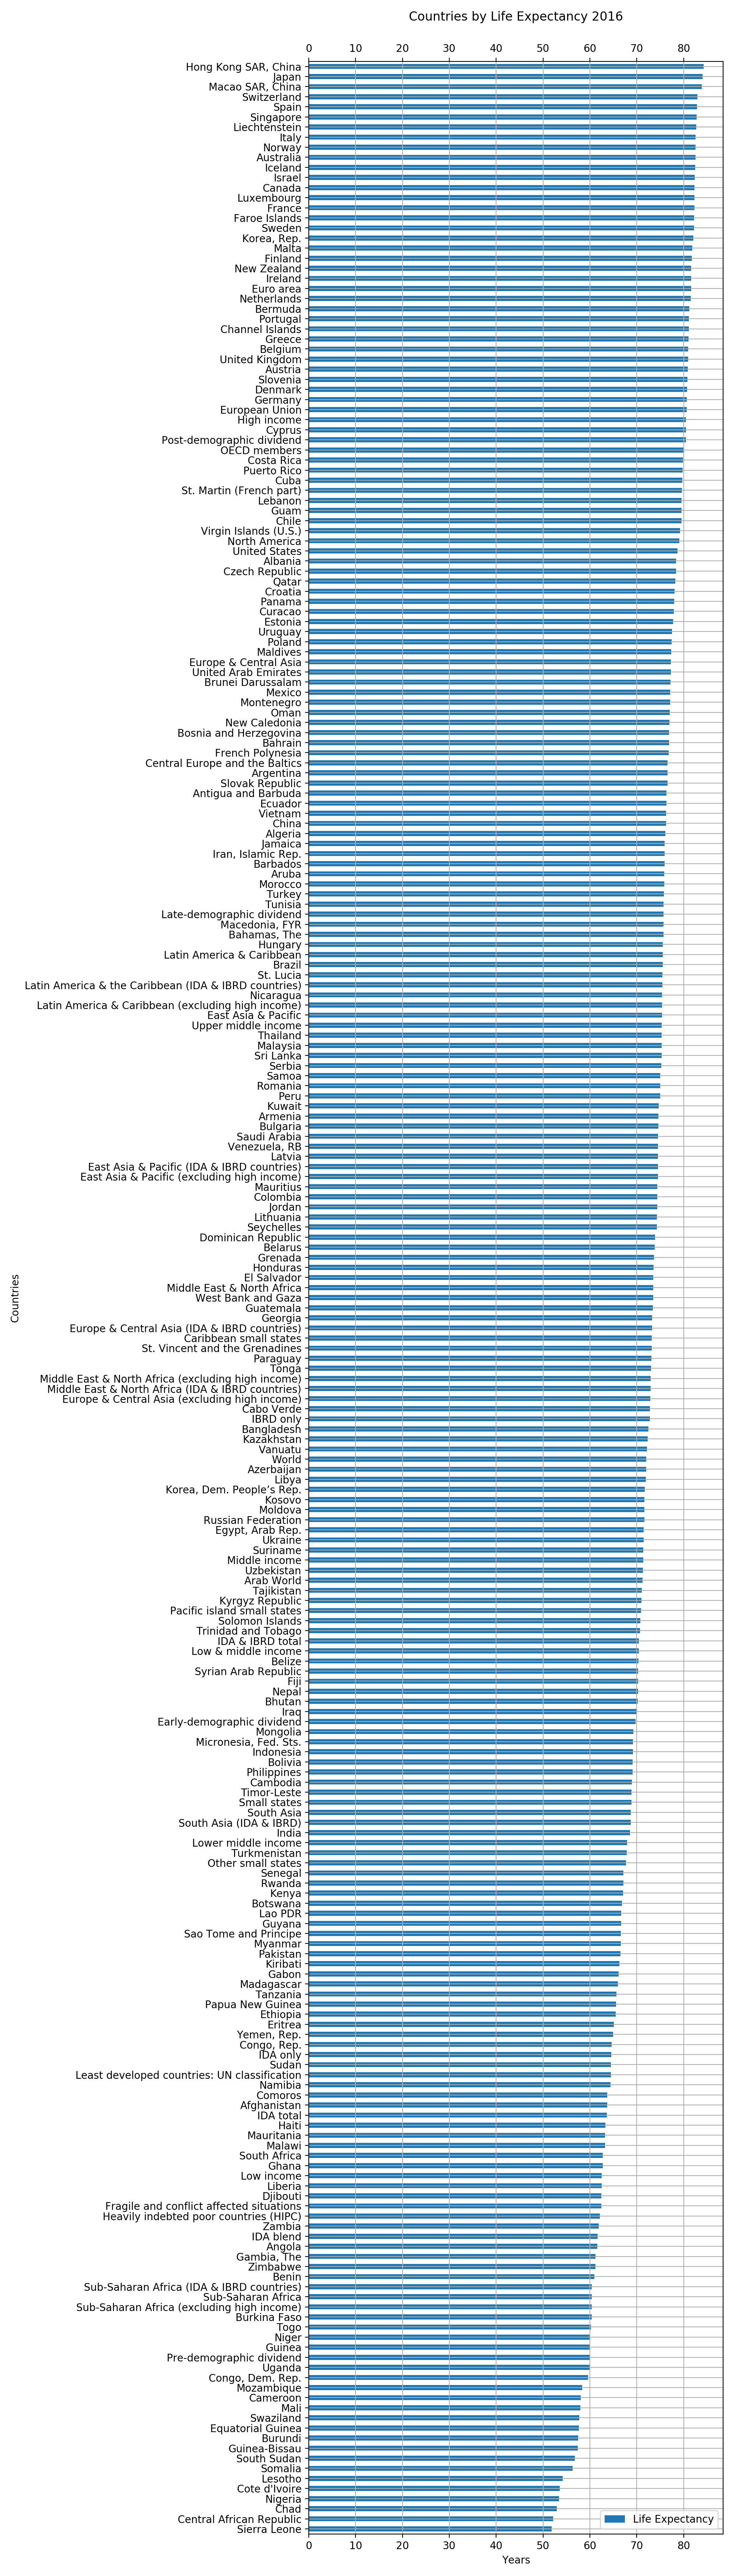

In [29]:
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
plt.rcParams['axes.titlepad'] = 40 
bottom_life_expectancy_2016.plot(kind="barh", figsize=(10,35))
plt.title("Countries by Life Expectancy 2016")

plt.xlabel("Years")
plt.ylabel("Countries")
plt.grid()

plt.savefig("countries_by_life_expectancy.png",bbox_inches='tight')
plt.show()
plt.tight_layout(pad=1)

In [88]:
average_changes = pd.DataFrame(life_expectancy.mean())

In [89]:
years = average_changes.index.tolist()
int_years = list(map(int, years))

average = average_changes[0].tolist()

In [90]:
x_axis = np.array(int_years)
y = np.array(average)

<IPython.core.display.Javascript object>


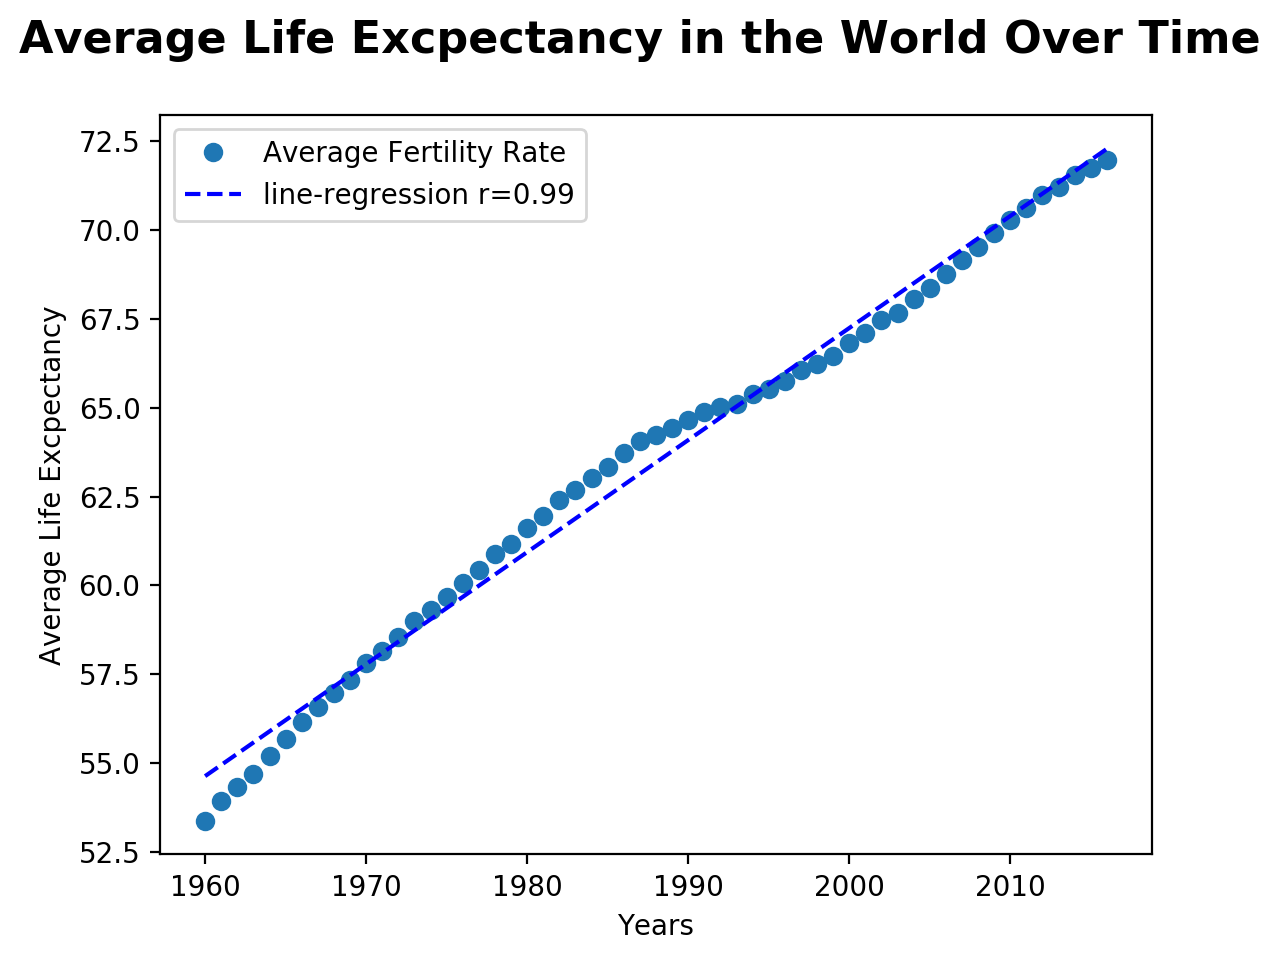

In [91]:
plt.clf()
plt.cla()
plt.close()
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

(slope, intercept, r_value, p_value, std_err) = linregress(x_axis,y)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()

fig.suptitle("Average Life Excpectancy in the World Over Time", fontsize=16, fontweight="bold")

ax.set_xlabel("Years")
ax.set_ylabel("Average Life Excpectancy")

ax.plot(x_axis, average_changes[0], linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')
plt.legend(['Average Fertility Rate', f'line-regression r={r_value.round(2)}'])
#r=-1 means that y and x are related in decreasing

plt.savefig("average_life_expectancy.png")
plt.show()

In [35]:
fertility_rate_file = 'Resources/fertility_rate.csv'
fertility_rate = pd.read_csv(fertility_rate_file)
#fertility_rate.head(3)

In [36]:
average_changes_fertility = pd.DataFrame(fertility_rate.mean())
years_f = average_changes_fertility.index.tolist()
int_years_f = list(map(int, years_f))
average_f = average_changes_fertility[0].tolist()
x_axis_f = np.array(int_years_f)
y_f = np.array(average_f)

<IPython.core.display.Javascript object>


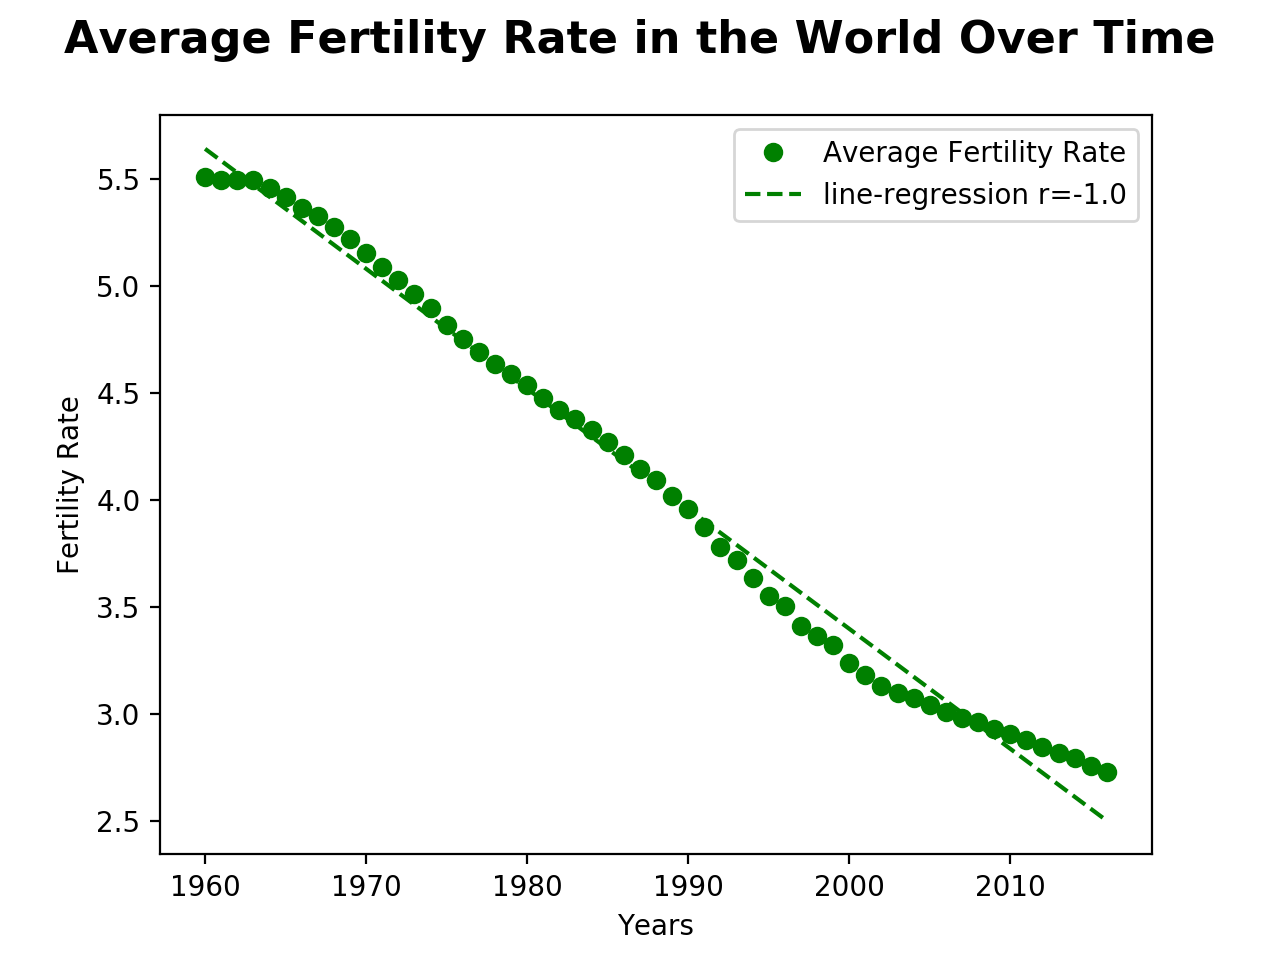

In [87]:
(slope_f, intercept_f, r_value_f, p_value_f, std_err_f) = linregress(x_axis_f,y_f)
fit_f = slope_f * x_axis_f + intercept_f

fig, ax = plt.subplots()

fig.suptitle("Average Fertility Rate in the World Over Time", fontsize=16, fontweight="bold")

ax.set_xlabel("Years")
ax.set_ylabel("Fertility Rate")
#r_value = r_value.format(round(a,2)
ax.plot(x_axis_f, average_changes_fertility[0], color = 'green', linewidth=0, marker='o')
ax.plot(x_axis_f, fit_f, 'g--')
plt.legend(['Average Fertility Rate', f'line-regression r={r_value_f.round(2)}'])
plt.savefig("average_fertility_rate.png")
#r=-1 means that y and x are related in decreasing

plt.show()

In [38]:
temperature_file = 'Resources/cckp_historical_data_0.csv' 
temperature = pd.read_csv(temperature_file)
temperature.head()

,ISO_3DIGIT,Jan_Temp,Feb_temp,Mar_temp,Apr_Temp,May_temp,Jun_Temp,July_Temp,Aug_Temp,Sept_temp,Oct_temp,Nov_Temp,Dec_temp,Annual_temp
0,AFG,0.07,2.11,7.60,13.37,18.22,23.20,25.26,23.77,19.03,12.99,7.00,2.43,12.92
1,AGO,22.58,22.68,22.78,22.35,20.74,18.37,17.95,19.90,22.19,23.18,22.79,22.61,21.51
2,ALB,2.02,3.22,6.04,9.92,14.44,17.93,20.54,20.48,17.16,12.27,7.58,3.65,11.27
3,ARE,18.43,19.43,22.61,26.58,30.62,32.46,33.80,33.55,31.74,28.34,24.06,20.28,26.83
4,ARG,20.80,19.90,17.51,14.05,10.65,7.66,7.42,9.02,11.53,14.67,17.54,19.83,14.22


In [39]:
gdp_file = 'Resources/countries_of_the_world.csv'
gdp = pd.read_csv(gdp_file)
gdp.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [40]:
temperature_code = temperature[['ISO_3DIGIT','Annual_temp']]
country_code = life_expectancy[['Country Name','Country Code']]
country_gdp = gdp[['Country', 'GDP ($ per capita)', 'Infant mortality (per 1000 births)']]
country_gdp = country_gdp.rename(columns={'Country':'Country Name'})
country_gdp['Country Name'] = country_gdp['Country Name'].apply(lambda x: x.strip())
#country_gdp.count()
country_gdp.head()
#repr(country_gdp['Country Name'][0])

,Country Name,GDP ($ per capita),Infant mortality (per 1000 births)
0,Afghanistan,700.0,"163,07"
1,Albania,4500.0,"21,52"
2,Algeria,6000.0,31
3,American Samoa,8000.0,"9,27"
4,Andorra,19000.0,"4,05"


In [41]:
country_code_new=country_code.merge(temperature_code, how='outer', left_on = 'Country Code', right_on='ISO_3DIGIT' )
country_temp =country_code_new[['Country Name', 'Annual_temp']] 

country_temp.head()
country_temp.count()
country_sort=country_temp.sort_values(by=['Country Name'])
country_sort = country_sort.reset_index(drop=True)
country_sort.head()

,Country Name,Annual_temp
0,Afghanistan,12.92
1,Albania,11.27
2,Algeria,22.58
3,American Samoa,NaN
4,Andorra,NaN


In [42]:
temp_gdp = pd.merge(country_gdp, country_sort, how='inner', on='Country Name')
temp_gdp.head()

,Country Name,GDP ($ per capita),Infant mortality (per 1000 births),Annual_temp
0,Afghanistan,700.0,"163,07",12.92
1,Albania,4500.0,"21,52",11.27
2,Algeria,6000.0,31,22.58
3,American Samoa,8000.0,"9,27",NaN
4,Andorra,19000.0,"4,05",NaN


In [43]:
life_expectancy_2016_temp = life_expectancy_2016.copy()
life_expectancy_2016_temp = life_expectancy_2016_temp.rename(columns={'2016': 'Life Expectancy'})
life_expectancy_2016_temp.head()

,Country Name,Life Expectancy
0,Aruba,75.867000
1,Afghanistan,63.673000
2,Angola,61.547000
3,Albania,78.345000
5,Arab World,71.198456


In [44]:
temp_gdp_lfex = pd.merge(temp_gdp, life_expectancy_2016_temp, how='inner', on='Country Name')
temp_gdp_lfex['Annual_temp']=(temp_gdp_lfex['Annual_temp'] * 9/5) + 32 

In [45]:
temp_gdp_lfex=temp_gdp_lfex.dropna(how='any')
#temp_gdp_lfex.count()
temp_gdp_lfex["Infant mortality (per 1000 births)"] = temp_gdp_lfex["Infant mortality (per 1000 births)"].replace({',':'.'},regex=True).apply(pd.to_numeric,1) 
temp_gdp_lfex.dtypes

Country Name                           object
GDP ($ per capita)                    float64
Infant mortality (per 1000 births)    float64
Annual_temp                           float64
Life Expectancy                       float64
dtype: object

<IPython.core.display.Javascript object>


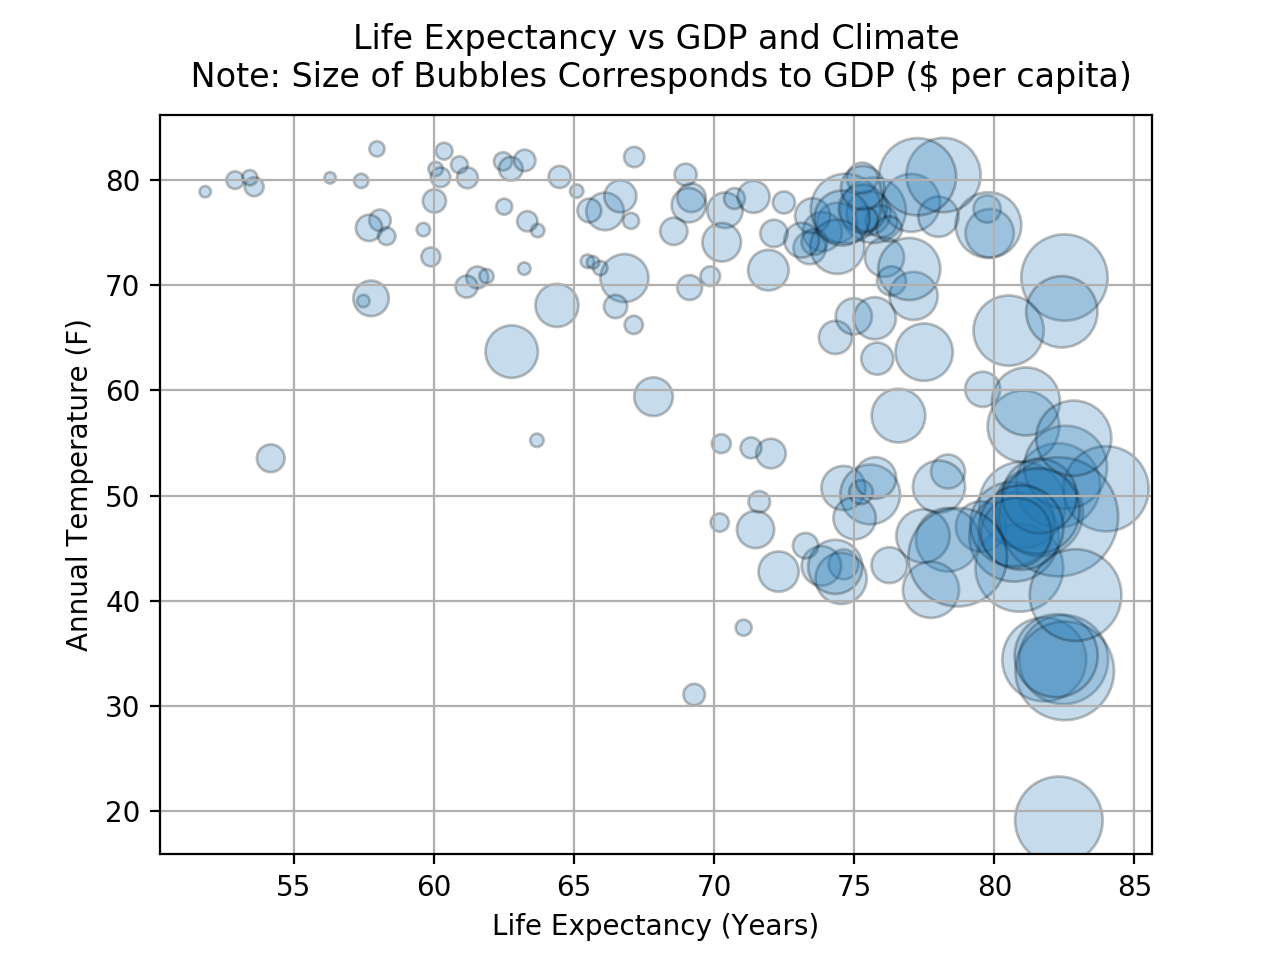

In [57]:
plt.clf()
plt.cla()
plt.close()
matplotlib.rcParams['interactive'] == True
plt.rcParams['axes.titlepad'] = 10 
x = temp_gdp_lfex['Life Expectancy']
y = temp_gdp_lfex['Annual_temp']
z = temp_gdp_lfex['GDP ($ per capita)']

plt.scatter(x, y, s=z/30,alpha=0.25, edgecolors="black", linewidth=1)
plt.xlabel("Life Expectancy (Years)")
plt.ylabel("Annual Temperature (F)")
plt.title('Life Expectancy vs GDP and Climate'
         '\n Note: Size of Bubbles Corresponds to GDP ($ per capita)')
#plt.figtext(.95, .5, "Note: \nSize of Bubbles Corresponds \nto GDP ($ per capita)", fontsize=12)
plt.savefig("life_expectancy_climate.png", bbox_inches = 'tight')

plt.grid()
plt.show()


<IPython.core.display.Javascript object>


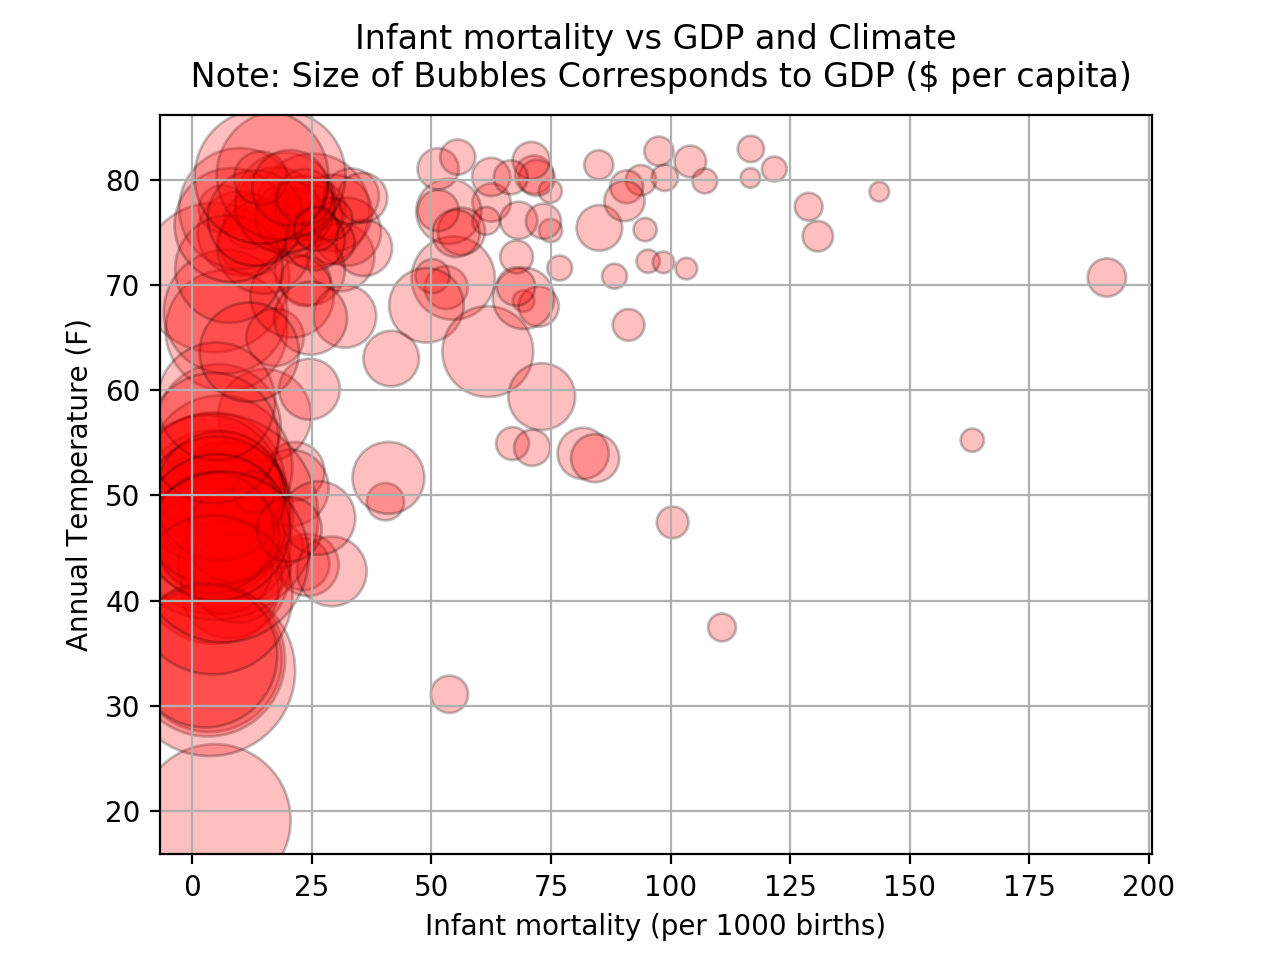

In [56]:
#matplotlib.rcParams['interactive'] == True
#plt.rcParams['axes.titlepad'] = 10
plt.clf()
plt.cla()
plt.close()
x1 = temp_gdp_lfex['Infant mortality (per 1000 births)']
y1 = temp_gdp_lfex['Annual_temp']
z1 = temp_gdp_lfex['GDP ($ per capita)']

plt.scatter(x1, y1, s=z1/10, color="Red", alpha=0.25, edgecolors="black", linewidth=1)
plt.xlabel('Infant mortality (per 1000 births)')
plt.ylabel("Annual Temperature (F)")
plt.title('Infant mortality vs GDP and Climate'
         '\n Note: Size of Bubbles Corresponds to GDP ($ per capita)')
#plt.figtext(.95, .5, "Note: \nSize of Bubbles Corresponds \nto GDP ($ per capita)", fontsize=12)

plt.grid()
plt.savefig("infant_mortality_climate.png", bbox_inches = 'tight')
plt.show()

In [48]:
fertility = fertility_rate[['Country Name', '2016']]
fertility_sort=fertility.sort_values(by=['Country Name'])
fertility_sort = fertility_sort.reset_index(drop=True)
fertility_sort = fertility_sort.rename(columns={'2016': 'Fertility Rate'})
fertility_sort.head()

,Country Name,Fertility Rate
0,Afghanistan,4.635
1,Albania,1.713
2,Algeria,2.776
3,American Samoa,NaN
4,Andorra,NaN


In [49]:
temp_gdp_fertility = pd.merge(temp_gdp_lfex, fertility_sort, how='inner', on='Country Name')
temp_gdp_fertility=temp_gdp_fertility.dropna(how='any')
#temp_gdp_fertility.head()
temp_gdp_fertility.dtypes

Country Name                           object
GDP ($ per capita)                    float64
Infant mortality (per 1000 births)    float64
Annual_temp                           float64
Life Expectancy                       float64
Fertility Rate                        float64
dtype: object

<IPython.core.display.Javascript object>


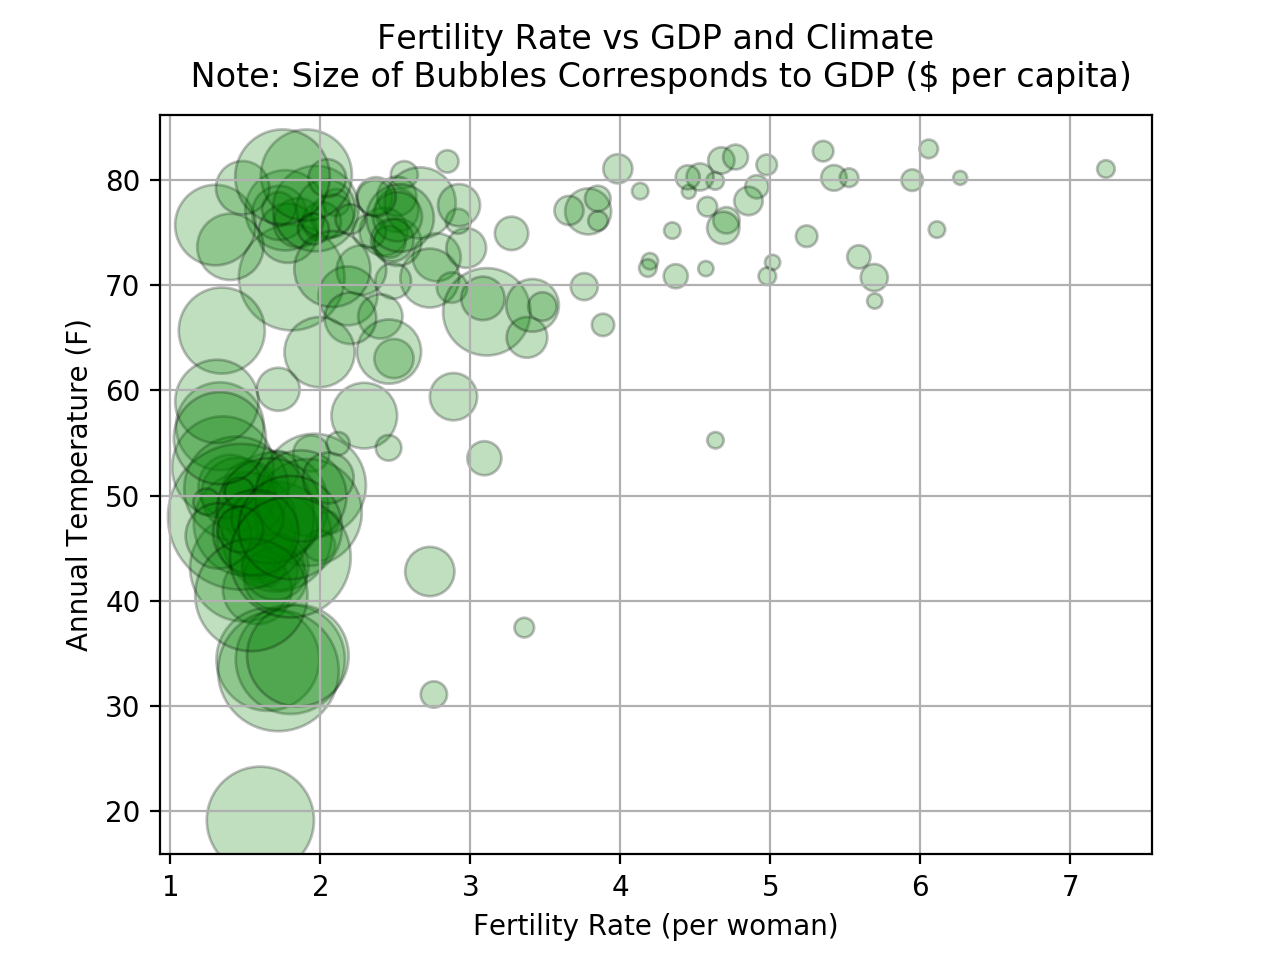

In [50]:
plt.clf()
plt.cla()
plt.close()
x2 = temp_gdp_fertility['Fertility Rate']
y2 = temp_gdp_fertility['Annual_temp']
z2 = temp_gdp_fertility['GDP ($ per capita)']

plt.scatter(x2, y2, s=z2/20, color="Green", alpha=0.25, edgecolors="black", linewidth=1)
plt.xlabel('Fertility Rate (per woman)')
plt.ylabel("Annual Temperature (F)")
plt.title('Fertility Rate vs GDP and Climate'
         '\n Note: Size of Bubbles Corresponds to GDP ($ per capita)')

plt.grid()
plt.savefig("fertility_rate_climate.png")

plt.show()